<a href="https://colab.research.google.com/github/XTMay/ML_DL/blob/main/Lecture_9/9_RNN_LSTM_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recurrent Neural Network (RNN)

## Example: RNN for Sentiment Analysis on IMDB Dataset

### The IMDB dataset available through tensorflow.keras.datasets is a dataset of 50,000 movie reviews from the Internet Movie Database (IMDB), labeled as either positive or negative. This dataset is commonly used for binary sentiment classification tasks, where the goal is to determine whether a review expresses a positive or negative sentiment.


### Key features of the IMDB dataset:

- 50,000 reviews: 25,000 reviews are used for training, and 25,000 are used for testing.
- Binary sentiment labels: Each review is classified as either positive (1) or negative (0).
- Preprocessed format: The reviews are already preprocessed, with each word replaced by a unique integer ID. Only the num_words most frequent words in the dataset are kept, while less frequent words are discarded.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence

### Import dataset

In [ ]:
# Load IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut reviews after this number of words (for padding/truncating)
batch_size = 32

### Split data

In [ ]:
# Split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences (to ensure equal length for all reviews)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


## Data Analysis

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Define a reverse dictionary to decode the integer sequences
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode reviews
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Convert train and test data into DataFrames
train_reviews = [decode_review(review) for review in train_data]
test_reviews = [decode_review(review) for review in test_data]

# Create DataFrames
df_train = pd.DataFrame({'review': train_reviews, 'label': train_labels})
df_test = pd.DataFrame({'review': test_reviews, 'label': test_labels})

# Display the first few rows of the training DataFrame
print(df_train.head())

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
                                              review  label
0  ? this film was just brilliant casting locatio...      1
1  ? big hair big boobs bad music and a giant saf...      0
2  ? this has to be one of the worst films of the...      0
3  ? the ? ? at storytelling the traditional sort...      1
4  ? worst mistake of my life br br i picked this...      0


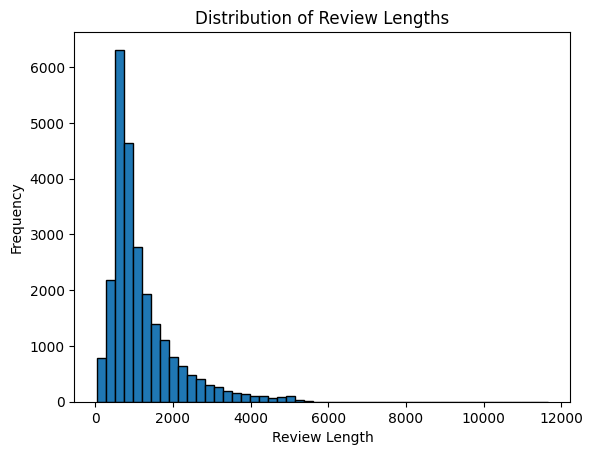

In [ ]:
import matplotlib.pyplot as plt

# Example: Plot the length of reviews
df_train['review_length'] = df_train['review'].apply(len)

plt.hist(df_train['review_length'], bins=50, edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

In [ ]:
# Example: View a sample review
print(df_train.iloc[0]['review'])
print("Label:", df_train.iloc[0]['label'])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Build a RNN model

In [ ]:
# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer
model.add(SimpleRNN(32))  # Simple RNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

### Compile the model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.6139 - loss: 0.6359 - val_accuracy: 0.6082 - val_loss: 0.6604
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7820 - loss: 0.4631 - val_accuracy: 0.7946 - val_loss: 0.4611
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8628 - loss: 0.3266 - val_accuracy: 0.8248 - val_loss: 0.4381
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9477 - loss: 0.1519 - val_accuracy: 0.7778 - val_loss: 0.5623
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9631 - loss: 0.1051 - val_accuracy: 0.7848 - val_loss: 0.6227
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9925 - loss: 0.0312 - val_accuracy: 0.7700 - val_loss: 0.7628
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9937 - loss: 0.0246 - val_accuracy: 0.7768 - val_loss: 0.8273
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9949 - loss: 0.0187 - 

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (32, 500, 32)          │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 966,341 (3.69 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644,228 (2.46 MB)

### Evaluate the model

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6077 - loss: 0.6407 - val_accuracy: 0.7496 - val_loss: 0.5148
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8255 - loss: 0.4010 - val_accuracy: 0.8152 - val_loss: 0.4246
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8975 - loss: 0.2551 - val_accuracy: 0.6682 - val_loss: 0.5931
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8136 - loss: 0.4139 - val_accuracy: 0.7138 - val_loss: 0.5759
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8684 - loss: 0.3191 - val_accuracy: 0.8210 - val_loss: 0.4407
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9180 - loss: 0.2257 - val_accuracy: 0.8276 - val_loss: 0.4686
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9342 - loss: 0.1808 - val_accuracy: 0.7688 - val_loss: 0.5385
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━

## LSTM

## Using LSTM Models in Financial Prediction

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)


### 1. Data Collection

In [ ]:
import yfinance as yf

# Download historical price data from Yahoo Finance
ticker = "AAPL"  # Apple stock symbol
start_date = "2010-01-01"
end_date = "2024-01-01"
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(data.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454504  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465663  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351056  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393280  447610800


In [ ]:
dataset = data
print(dataset.describe())

              Open         High          Low        Close    Adj Close  \
count  3522.000000  3522.000000  3522.000000  3522.000000  3522.000000   
mean     59.883701    60.528731    59.267621    59.926226    57.701397   
std      55.387520    56.014467    54.812449    55.444533    55.642305   
min       6.870357     7.000000     6.794643     6.858929     5.792195   
25%      19.680447    19.832321    19.402321    19.608571    16.986191   
50%      32.303749    32.633751    32.078751    32.340000    29.103408   
75%      91.213125    92.512501    90.425623    91.207499    88.971634   
max     198.020004   199.619995   197.000000   198.110001   197.361084   

             Volume  
count  3.522000e+03  
mean   2.422834e+08  
std    2.204578e+08  
min    2.404830e+07  
25%    9.266760e+07  
50%    1.526602e+08  
75%    3.284715e+08  
max    1.880998e+09  


In [ ]:
dataset.isna().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

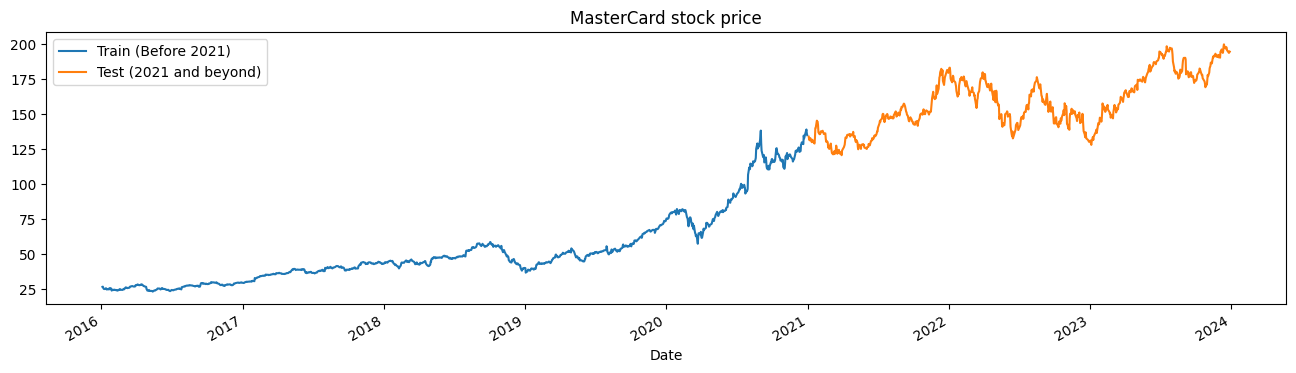

In [ ]:
tstart = 2016 # Training 2016 - 2020
tend = 2020 # Test

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)


### 2. Data Preprocessing

In [ ]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)


In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)


In [ ]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)


### 3. Building the LSTM Model

In [ ]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 125)            │        63,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Training and Evaluating the Model

In [ ]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0241
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.3012e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.2915e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.5072e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.8940e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4098e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.0192e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.6976e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.4279e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/ste

In [ ]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))


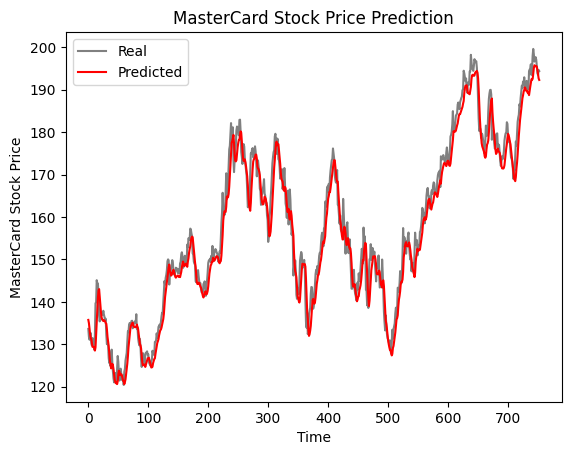

In [ ]:
plot_predictions(test_set,predicted_stock_price)

In [ ]:
return_rmse(test_set,predicted_stock_price)


The root mean squared error is 3.60.


# Stop by Epochs 10 (TODO)

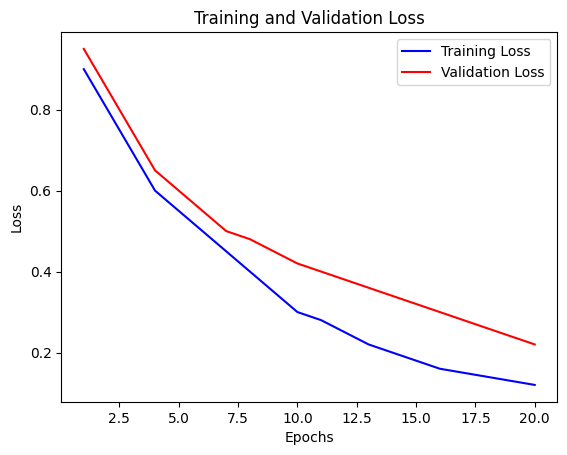

In [ ]:
import matplotlib.pyplot as plt

# Example loss values for training and validation
epochs = range(1, 21)
train_loss = [0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.28, 0.25, 0.22, 0.2, 0.18, 0.16, 0.15, 0.14, 0.13, 0.12]
val_loss = [0.95, 0.85, 0.75, 0.65, 0.6, 0.55, 0.5, 0.48, 0.45, 0.42, 0.4, 0.38, 0.36, 0.34, 0.32, 0.3, 0.28, 0.26, 0.24, 0.22]

plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
